In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AE_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,NaN,1.85,NaN,0.00,1.85,0.00,NaN,...,0.0,NaN,NaN,0.0,0.000,NaN,0.000,NaN,NaN,NaN
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,NaN,0.0,0.00,0.00,NaN,0.00,0.00,NaN,...,0.0,NaN,0.000,0.0,NaN,0.000,NaN,3.043,NaN,NaN
4594,0.00,0.00,NaN,0.0,0.00,0.00,NaN,0.00,0.00,NaN,...,0.0,NaN,0.136,0.0,NaN,0.000,NaN,1.837,NaN,NaN
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	265
float64		column 2	116
float64		column 3	120
float64		column 4	87
float64		column 5	116
float64		column 6	319
float64		column 7	348
float64		column 8	294
float64		column 9	464
float64		column 10	352
float64		column 11	294
float64		column 12	87
float64		column 13	174
float64		column 14	352
float64		column 15	671
float64		column 16	174
float64		column 17	522
float64		column 18	464
float64		column 19	207
float64		column 20	468
float64		column 21	464
float64		column 22	203
float64		column 23	671
float64		column 24	406
float64		column 25	729
float64		column 26	667
float64		column 27	116
float64		column 28	729
float64		column 29	671
float64		column 30	787
float64		column 31	729
float64		column 32	816
float64		column 33	116
float64		column 34	903
float64		column 35	783
float64		column 36	932
float64		column 37	613
float64		column 38	203
float64		column 39	464
float64		column 40	816
float64		column 41	348
float64		column 42	580
float64

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4332.000000,4481.000000,4477.000000,4510.000000,4481.000000,4278.000000,4249.000000,4303.000000,4133.000000,4245.000000,...,4394.000000,3901.000000,3955.000000,4158.000000,4162.000000,3955.000000,4100.000000,3839.000000,4075.000000,3839.000000
mean,0.105254,0.217005,0.282325,0.066636,0.315334,0.096377,0.113231,0.105396,0.087769,0.239899,...,0.032440,0.038324,0.138876,0.016580,0.271927,0.075651,0.045269,4.918173,51.966871,275.740557
std,0.305353,1.307156,0.507304,1.409114,0.676787,0.275484,0.387651,0.407657,0.274136,0.653159,...,0.291186,0.239522,0.277986,0.110839,0.833680,0.248197,0.452254,31.080885,201.188133,603.818832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.611000,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.283000,15.000000,96.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.186000,0.000000,0.322750,0.051000,0.000000,3.689000,43.000000,262.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.367000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

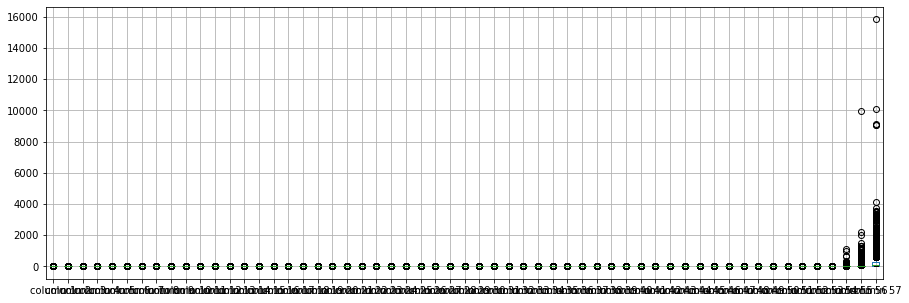

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.105254
column 2       0.217005
column 3       0.282325
column 4       0.066636
column 5       0.315334
column 6       0.096377
column 7       0.113231
column 8       0.105396
column 9       0.087769
column 10      0.239899
column 11      0.059424
column 12      0.543235
column 13      0.094194
column 14      0.057060
column 15      0.050204
column 16      0.250393
column 17      0.142771
column 18      0.191665
column 19      1.661601
column 20      0.085435
column 21      0.814120
column 22      0.114506
column 23      0.101449
column 24      0.095194
column 25      0.558239
column 26      0.267878
column 27      0.767534
column 28      0.130649
column 29      0.099939
column 30      0.107010
column 31      0.062852
column 32      0.045898
column 33      0.098895
column 34      0.046971
column 35      0.105697
column 36      0.101176
column 37      0.139746
column 38      0.013817
column 39      0.081873
column 40      0.063615
column 41      0.044003
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.017895,0.064004,-0.000850,0.023347,0.056628,-0.002147,-0.008507,0.089583,0.033556,...,-0.019096,-0.025484,-0.017189,-0.033201,0.053675,0.109429,-0.009020,0.029179,0.052369,0.081301
column 2,-0.017895,1.000000,-0.036398,-0.007359,-0.025993,-0.024375,0.002891,-0.017374,-0.005760,0.029570,...,-0.015965,-0.008217,-0.050150,-0.018393,-0.017964,-0.014213,0.001577,0.001269,-0.003943,-0.024974
column 3,0.064004,-0.036398,1.000000,-0.019054,0.073106,0.084812,0.032242,0.010367,0.093752,0.030536,...,-0.027790,-0.034991,-0.017214,-0.034032,0.102491,0.089583,-0.001521,0.068814,0.097969,0.068488
column 4,-0.000850,-0.007359,-0.019054,1.000000,0.007299,-0.015097,0.026148,0.003878,-0.001216,-0.004803,...,-0.002074,0.001342,-0.014137,-0.006204,-0.003449,0.008220,-0.001795,0.004059,0.020081,0.019211
column 5,0.023347,-0.025993,0.073106,0.007299,1.000000,0.050700,0.149456,0.024329,0.018852,0.029936,...,-0.032997,-0.032546,-0.053100,-0.026512,0.021524,0.035857,0.002821,0.042535,0.050402,0.003215
column 6,0.056628,-0.024375,0.084812,-0.015097,0.050700,1.000000,0.049148,0.078290,0.113930,0.014332,...,-0.031845,-0.019467,-0.003617,-0.026019,0.061622,0.105877,0.018179,-0.008597,0.083920,0.078391
column 7,-0.002147,0.002891,0.032242,0.026148,0.149456,0.049148,1.000000,0.032277,0.037392,0.053450,...,-0.031029,-0.032497,-0.052910,-0.028968,0.045902,0.070666,0.052444,0.042353,0.052633,-0.011687
column 8,-0.008507,-0.017374,0.010367,0.003878,0.024329,0.078290,0.032277,1.000000,0.093121,0.070120,...,-0.023917,-0.027824,-0.033941,-0.016194,0.029795,0.055581,-0.007464,0.010836,0.029978,0.040995
column 9,0.089583,-0.005760,0.093752,-0.001216,0.018852,0.113930,0.037392,0.093121,1.000000,0.120255,...,-0.024877,-0.013515,-0.027422,0.015099,0.041791,0.141019,-0.001387,0.100279,0.172220,0.235639
column 10,0.033556,0.029570,0.030536,-0.004803,0.029936,0.014332,0.053450,0.070120,0.120255,1.000000,...,-0.016438,0.014841,0.003422,0.007613,0.029671,0.068496,0.045543,0.060993,0.088109,0.080333


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+4,17+4+4,17+4+4+4,17+4+4,17+4,17], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 551.1094425746372
Epoch: 1 , loss: 551.3506333354458
Epoch: 2 , loss: 551.7808506663253
Epoch: 3 , loss: 548.5375875811959
Epoch: 4 , loss: 551.4266654356846
Epoch: 5 , loss: 542.5731830397549
Epoch: 6 , loss: 551.8061631365521
Epoch: 7 , loss: 551.5620216874711
Epoch: 8 , loss: 550.0391533084032
Epoch: 9 , loss: 551.2735907258888
Epoch: 10 , loss: 552.5344215951314
Epoch: 11 , loss: 554.5828309540965
Epoch: 12 , loss: 546.6119003030066
Epoch: 13 , loss: 550.4490597821278
Epoch: 14 , loss: 543.8445602576492
Epoch: 15 , loss: 543.5734374681001
Epoch: 16 , loss: 542.903557089563
Epoch: 17 , loss: 538.2806101941896
Epoch: 18 , loss: 525.274351299432
Epoch: 19 , loss: 500.4301000721363
Epoch: 20 , loss: 480.9461760570779
Epoch: 21 , loss: 471.8156392698919
Epoch: 22 , loss: 463.902111332591
Epoch: 23 , loss: 464.2537891773397
Epoch: 24 , loss: 467.31170154531657
Epoch: 25 , loss: 449.2173894955306
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.016386,0.0,0.001989,0.000000,0.0,0.000000,0.131279,...,0.000000,0.021235,-0.089331,0.0,0.000000,0.024906,0.000000,-1.094722,-4.755279,-19.504841
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4593,0.000000,0.0,0.295679,0.000000,0.0,0.000000,0.083551,0.0,0.000000,0.185273,...,0.000000,0.016428,0.000000,0.0,0.211055,0.000000,0.013878,0.000000,-6.181751,-45.413063
4594,0.000000,0.0,0.198537,0.000000,0.0,0.000000,0.066255,0.0,0.000000,0.124850,...,0.000000,0.012352,0.000000,0.0,0.153368,0.000000,-0.397191,0.000000,-5.861398,-50.024443
4595,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

18883.35411399966

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3978906404812214

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.64,0.640000,0.000000,0.32,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.778000,0.000000,0.000000,3.756000,61.000000,278.000000
1,0.210000,0.28,0.500000,0.000000,0.14,0.280000,0.210000,0.07,0.000000,0.940000,...,0.000000,0.000000,0.132000,0.0,0.372000,0.180000,0.048000,5.114000,101.000000,1028.000000
2,0.000000,0.00,0.000000,0.000000,0.63,0.000000,0.310000,0.63,0.310000,0.630000,...,0.000000,0.000000,0.135000,0.0,0.135000,0.000000,0.000000,3.537000,40.000000,191.000000
3,0.000000,0.00,0.000000,0.016386,1.85,0.001989,0.000000,1.85,0.000000,0.131279,...,0.000000,0.021235,0.133669,0.0,0.000000,0.024906,0.000000,1.905278,10.244721,34.495159
4,0.000000,0.00,0.000000,0.000000,1.92,0.000000,0.000000,0.00,0.000000,0.640000,...,0.000000,0.000000,0.054000,0.0,0.164000,0.054000,0.000000,1.671000,4.000000,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.00,0.640000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.348000,0.0,1.160000,0.000000,0.000000,3.121000,15.000000,103.000000
4593,0.000000,0.00,0.295679,0.000000,0.00,0.000000,0.083551,0.00,0.000000,0.185273,...,0.000000,0.016428,0.000000,0.0,0.211055,0.000000,0.013878,3.043000,8.818249,24.586937
4594,0.000000,0.00,0.198537,0.000000,0.00,0.000000,0.066255,0.00,0.000000,0.124850,...,0.000000,0.012352,0.136000,0.0,0.153368,0.000000,0.011809,1.837000,6.138602,17.975557
4595,0.170000,0.00,0.680000,0.000000,0.34,0.340000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.032000,0.0,0.065000,0.000000,0.000000,1.189000,5.000000,69.000000


In [21]:
imputations[-1].to_excel("Spam_AE_1(imp).xlsx", index=False, header=False)